<a href="https://colab.research.google.com/github/JasonJeng/Lab3-Zoning-Maps-Pandas/blob/main/IDCE30274_Lab2_ZeZheng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating Zoning Maps Using Python & Pandas**

Zexing Zheng

05/06/2021

Python 3



In [ ]:
# Add gis packages to colab environment
!pip install geopandas
!apt-get install -y libspatialindex-dev
!pip install rtree

# Then import packages
import pandas as pd  # provides interface for interacting with tabular data
import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
import rtree  # supports geospatial join

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') # connects Colab to your Google Drive
root_path = 'gdrive/My Drive/CLARK/IDCE30274/Lab3/' # set root path to folder where you uploaded the data

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Read in PUDs file as a geodataframe and initialize coordinate reference system (CRS)
puds = gpd.read_file(root_path+'input/Planned_Unit_Development_(PUDs).shp', crs = {'init' :'epsg:4326'})
aff = pd.read_csv(root_path+'input/Affordable_Housing.csv')
crosswalk = pd.read_csv(root_path+'input/zoning_crosswalk.csv')

In [ ]:
# Running this code grabs rows from the first 3 index places (4 rows total!)
puds.sample(3)

,OBJECTID,PUD_NAME,PUD_WEB_UR,PUD_CHANGE,PUD_ZONING,PUD_STATUS,PUD_CASE_N,GLOBALID,WARD,SHAPEAREA,SHAPELEN,geometry
153,187092,P.N. Hoffman Inc & Riverside Baptist Church,https://app.dcoz.dc.gov/Content/Search/ViewCas...,DC Register 3/18/16,C-3-A,Final,15-05,{E3622F41-77BF-44B2-A960-A67CD94897F1},Ward 6,0,0,"POLYGON ((-77.02240 38.87870, -77.02187 38.879..."
197,187054,TC/CSG St. Matthews LLC,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Case # 11-13, Approved July 6th 2012",CR,Final,11-13A,{40F80E64-D54F-4CFD-BC53-DA7F7C9BC118},Ward 6,0,0,"POLYGON ((-77.01422 38.87580, -77.01481 38.875..."
183,187122,George Washington University & Boston Properties,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Setdown 6/25/17, DC Register 7/27/18",MU-30,Final,06-11O/06-12O,{0EA2FBA6-E4F4-46ED-A05F-FD8914DAADC0},Ward 2,0,0,"POLYGON ((-77.04758 38.90145, -77.04758 38.901..."


In [ ]:
aff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   X                              558 non-null    float64
 1   Y                              558 non-null    float64
 2   OBJECTID                       558 non-null    int64  
 3   MAR_WARD                       558 non-null    object 
 4   ADDRESS                        555 non-null    object 
 5   PROJECT_NAME                   558 non-null    object 
 6   STATUS_PUBLIC                  558 non-null    object 
 7   AGENCY_CALCULATED              558 non-null    object 
 8   TOTAL_AFFORDABLE_UNITS         558 non-null    int64  
 9   LATITUDE                       555 non-null    float64
 10  LONGITUDE                      555 non-null    float64
 11  AFFORDABLE_UNITS_AT_0_30_AMI   558 non-null    int64  
 12  AFFORDABLE_UNITS_AT_31_50_AMI  558 non-null    int

In [ ]:
# This gives you a summary of what is within the PUD .shp file
puds.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    302 non-null    int64   
 1   PUD_NAME    302 non-null    object  
 2   PUD_WEB_UR  302 non-null    object  
 3   PUD_CHANGE  300 non-null    object  
 4   PUD_ZONING  302 non-null    object  
 5   PUD_STATUS  302 non-null    object  
 6   PUD_CASE_N  302 non-null    object  
 7   GLOBALID    302 non-null    object  
 8   WARD        301 non-null    object  
 9   SHAPEAREA   302 non-null    int64   
 10  SHAPELEN    302 non-null    int64   
 11  geometry    302 non-null    geometry
dtypes: geometry(1), int64(3), object(8)
memory usage: 28.4+ KB


In [ ]:
# Create a geometry column in the affordable housing dataframe
aff['geometry'] = aff.apply(lambda row: Point(row.X, row.Y), axis=1)
aff = gpd.GeoDataFrame(aff, crs={'init' :'epsg:4326'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
aff.sample(1) #sampling to the first index... or column headers and one row.

In [ ]:
# Use geospatial join to identify which PUDs include affordable housing projects
puds_aff = gpd.sjoin(puds, aff, op='intersects', how='left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  


In [ ]:
# Check our Merge - incremental development, we're checking as we go!
puds_aff.info()

In [ ]:
# Merge dataframe with zoning categories crosswalk
puds_info = puds_aff.merge(crosswalk[['Zone_Cat']], how='left', left_on='PUD_ZONING', right_on=crosswalk['Zone'])

In [ ]:
# Quick count using print statements to show us how many PUDs there are total, and how many offer affordable housing.

print(f"Total count of PUDs: {puds_info.shape[0]}")
print(f"Count PUDs offering Affordable Housing: {puds_info.loc[~puds_info.PROJECT_NAME.isna()].shape[0]}")

Total count of PUDs: 310
Count PUDs offering Affordable Housing: 83


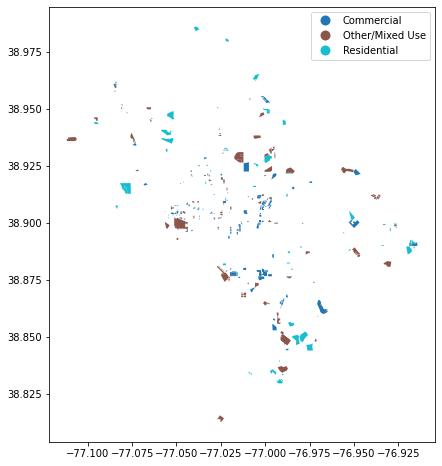

In [ ]:
# Create a map of PUDs by Zoning Category
puds_info.plot(column='Zone_Cat', legend=True, figsize=(16,8));

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:642: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


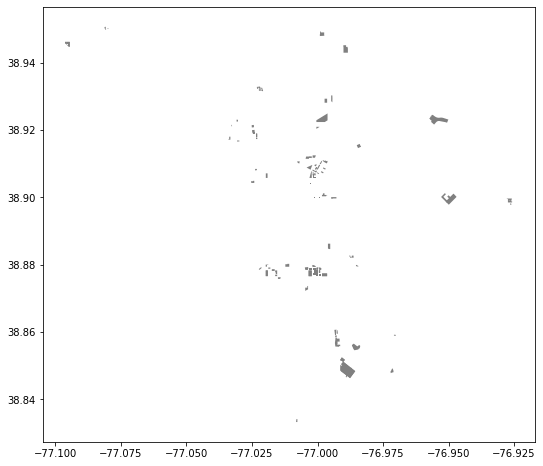

In [ ]:
# Create a map of just the PUDs that provide Affordable Housing
puds_info[puds_info['TOTAL_AFFORDABLE_UNITS']>0].plot(column='TOTAL_AFFORDABLE_UNITS', color='grey', figsize=(16,8));

In [ ]:
# Export geodataframe as shapefile within Colab environment
puds_info.to_file('puds_info.shp')

# Copy shapefile components from Colab environment to Google Drive using bash script
!cp puds_info.cpg 'gdrive/My Drive/CLARK/IDCE30274/Lab3/output'
!cp puds_info.dbf 'gdrive/My Drive/CLARK/IDCE30274/Lab3/output'
!cp puds_info.prj 'gdrive/My Drive/CLARK/IDCE30274/Lab3/output'
!cp puds_info.shp 'gdrive/My Drive/CLARK/IDCE30274/Lab3/output'
!cp puds_info.shx 'gdrive/My Drive/CLARK/IDCE30274/Lab3/output'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  
